In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-28 20:43:56.883315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-28 20:43:56.892568: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-28 20:43:56.895620: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 20:43:57.377429: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
data_path = "../../data/sgdm_wobn"
image_path = "./images"
lr_to_p_fn = lambda lr : np.sqrt(0.001/lr)
to_log_fn = lambda wd: np.log(wd)
acc_fn = lambda p : max_acc(get_stats(p,"test_stats"))

Max test accuracy of Standard is 82.43% with lr 0.0128 | p 0.1131370849898476


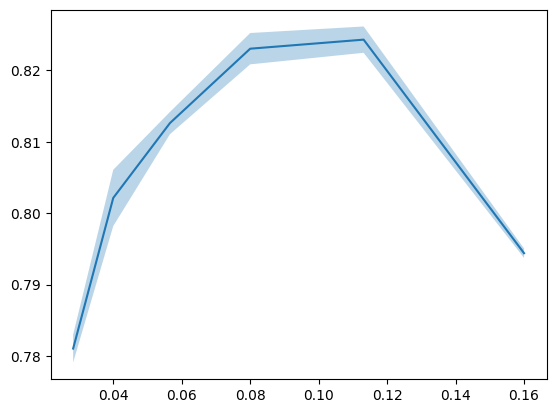

In [5]:
x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),
                          lambda js : np.sqrt(js["optimizer"]["lr"]), 
                          acc_fn,
                          plt, 
                          norm=False,
                          label="noreg")
print("Max test accuracy of Standard is {0}% with lr {1} | p {2}".format(round(100*y.max(),2),round(x[y.argmax()]**2,6),x[y.argmax()]))

Max test accuracy of norm is 84.33% with p 1.0
Max test accuracy of cnorm is 86.9% with p 0.8
Max test accuracy of cnormu is 84.57% with p 0.8
Max test accuracy of gcstdu is 84.02% with p 1.0
Max test accuracy of wd is 83.61% with lambda 8e-05


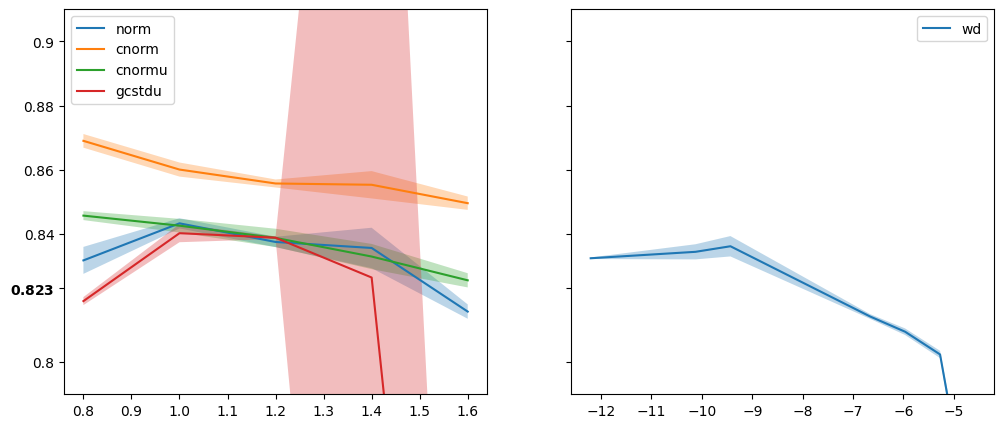

In [6]:
fig,axs = plt.subplots(ncols=2,nrows=1,sharey="row")

for exp in ["norm","cnorm","cnormu","gcstdu"]:

    x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}"),
                              lambda js: js["norm"]["norm_multiply"],
                              acc_fn, 
                              axs[0], 
                              norm=False, 
                              label=exp)
    print("Max test accuracy of {0} is {1}% with p {2}".format(exp,round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/wd"),
                          lambda js : np.log(js["optimizer"]["lambda_wd"]),
                          acc_fn,
                          axs[1], 
                          norm=False,
                          label="wd")
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))

noreg_001_stats = get_stats(f"{data_path}/noreg/0.0064","test_stats")
noreg_001_stats_y = np.mean(np.max(list(noreg_001_stats["acc"].values()),axis=0))

y_ticks = [0.8,round(noreg_001_stats_y,3), 0.84, 0.86, 0.88, 0.9]
y_labels = ['0.8',f'$\\mathbf{{{round(noreg_001_stats_y,3):.3f}}}$', '0.84', '0.86', '0.88', '0.9']  # Bold 30 using LaTeX

axs[0].set_yticks(y_ticks)
axs[0].set_yticklabels(y_labels)

axs[0].set_ylim(0.79,0.91)
fig.set_size_inches(12,5)
axs[0].legend()
axs[1].legend()

In [7]:
stats = get_stats(f"{data_path}/cnormu/0.8_1","test_stats")
acc_vals = list(stats["acc"].values())
acc_keys = list(stats["acc"].keys())
#num_data_points = min(int(0.25*len(acc_vals)),50)
num_data_points = int(0.25*len(acc_vals))
last_vals = np.mean(np.stack(acc_vals[-num_data_points:],axis=0),axis=-1)
last_keys = np.asanyarray(acc_keys[-num_data_points:])
m,b = np.polyfit(last_keys, last_vals, 1)
print(m*1e8)

0.09839309716560332


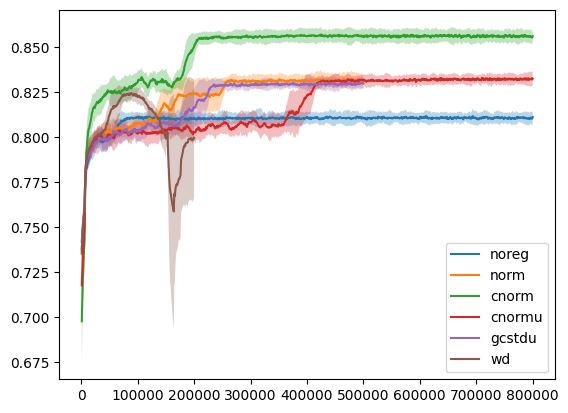

In [8]:
SMOOTHING = 5


plot_step_stat(get_stats(f"{data_path}/noreg/0.0128","test_stats")["acc"],plt,label="noreg",smoothing=SMOOTHING)
plot_step_stat(get_stats(f"{data_path}/norm/1.0_1","test_stats")["acc"],plt,label="norm",smoothing=SMOOTHING)
plot_step_stat(get_stats(f"{data_path}/cnorm/0.8_1","test_stats")["acc"],plt,label="cnorm",smoothing=SMOOTHING)
plot_step_stat(get_stats(f"{data_path}/cnormu/0.8_1","test_stats")["acc"],plt,label="cnormu",smoothing=SMOOTHING)
plot_step_stat(get_stats(f"{data_path}/gcstdu/1.0_1","test_stats")["acc"],plt,label="gcstdu",smoothing=SMOOTHING)
plot_step_stat(get_stats(f"{data_path}/wd/8e-05","test_stats")["acc"],plt,label="wd",smoothing=SMOOTHING)


#plot_step_stat(get_stats(f"{data_path}/noreg/0.0128","test_stats")["acc"],plt,label="0.0128")
#plot_step_stat(get_stats(f"{data_path}/noreg/0.0064","test_stats")["acc"],plt,label="0.0064")
#plot_step_stat(get_stats(f"{data_path}/noreg/0.0256","test_stats")["acc"],plt,label="0.0256")
plt.legend()


/home/miri/miniconda3/envs/emecomspec/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/home/miri/miniconda3/envs/emecomspec/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


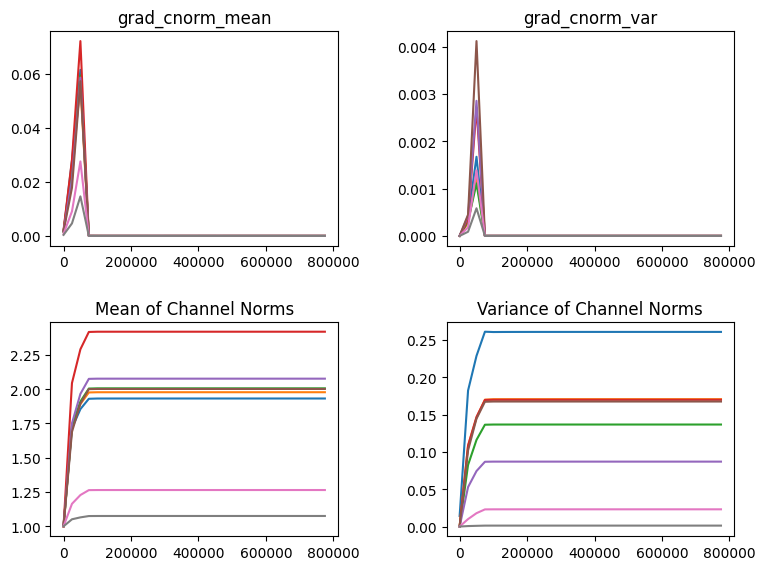

In [9]:
fig,axs = plot_data(f"{data_path}/noreg/0.0128", lambda d :     
                    {0 :    {
                            0 :  
                                ("grad_cnorm_mean", d["grad_cnorm_mean"]) , 
                            1 :  
                                ("grad_cnorm_var", d["grad_cnorm_var"]) 
                            },
                    1 :    {
                            0 :  
                                ("Mean of Channel Norms", d["cnorm_mean"]) , 
                            1 :  
                                ("Variance of Channel Norms", d["cnorm_var"]) 
                            }})

fig.tight_layout()
fig.set_size_inches(8,6)
lines, labels = axs[0][0].get_legend_handles_labels()



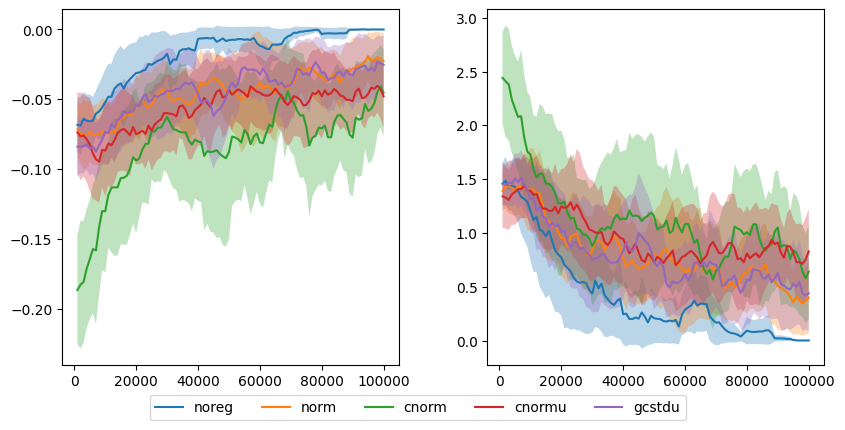

In [16]:
exps = ["noreg/0.0128/mg_spacing_0","norm/1.0_1/mg_spacing_0","cnorm/0.8_1/mg_spacing_0","cnormu/0.8_1/mg_spacing_0","gcstdu/1.0_1/mg_spacing_0"]
fig,axs = plt.subplots(ncols=2,nrows=1)
for i,exp in enumerate(exps):
    path = f"{data_path}/{exp}"
    ckpt_paths_grads = get_ckpt_paths(path,"grads")

    @jax.jit
    @partial(jax.vmap,in_axes=(0))
    def get_grad_norm_fn(grads):
        norms = tree_map(lambda w : jnp.linalg.vector_norm(jnp.reshape(w,-1)),grads)
        return norms

    @jax.jit
    @partial(jax.vmap,in_axes=(0))
    @partial(jax.vmap,in_axes=(0))
    def polyfit_fn(norms):

        return jnp.polyfit(jnp.arange(norms.size,dtype=jnp.float32),norms,1)

    x = [e[0] for e in list(ckpt_paths_grads.items())]
    with ThreadPool(processes=12) as pool:
        row_dict = pool.map(lambda e : get_grad_norm_fn(load([e[1]])),list(ckpt_paths_grads.items()))
    
    row_dict = tree_map(lambda *x : jnp.asarray(x) , *[e for e in row_dict if e is not None])
    row_dict = jnp.asarray([val["kernel"] for _,val in row_dict.items()]).T

    polyfit_result = tree_map(polyfit_fn,row_dict)

    mean_m = np.mean(polyfit_result[:,:,0],axis=0)
    std_m = np.std(polyfit_result[:,:,0],axis=0)
    mean_m,std_m = smooth(mean_m,std_m,4)
    axs[0].plot(x,mean_m,label=exp.split("/")[0])
    axs[0].fill_between(x, mean_m-std_m, mean_m+std_m, alpha=0.3)

    mean_b = np.mean(polyfit_result[:,:,1],axis=0)
    std_b = np.std(polyfit_result[:,:,1],axis=0)
    mean_b,std_b = smooth(mean_b,std_b,4)
    axs[1].plot(x,mean_b,label=exp.split("/")[0])
    axs[1].fill_between(x, mean_b-std_b, mean_b+std_b, alpha=0.3)


lines, labels = axs[1].get_legend_handles_labels()
fig.legend(lines, labels, loc='lower center', ncol=len(labels), bbox_to_anchor=(0.5,-0.075), bbox_transform=fig.transFigure)
fig.tight_layout()
fig.set_size_inches(9,4)


/home/miri/miniconda3/envs/emecomspec/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/miri/miniconda3/envs/emecomspec/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


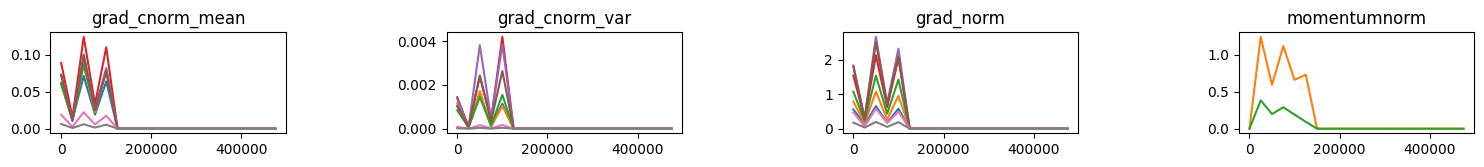

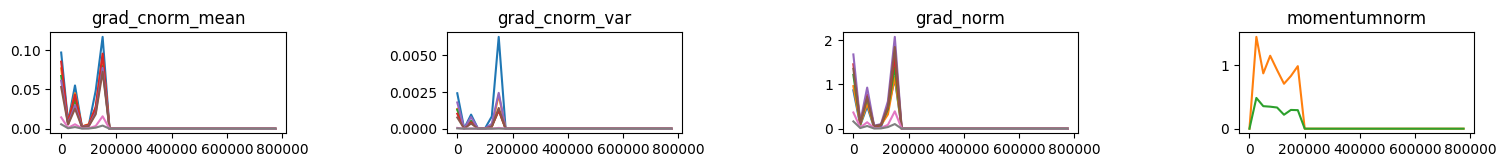

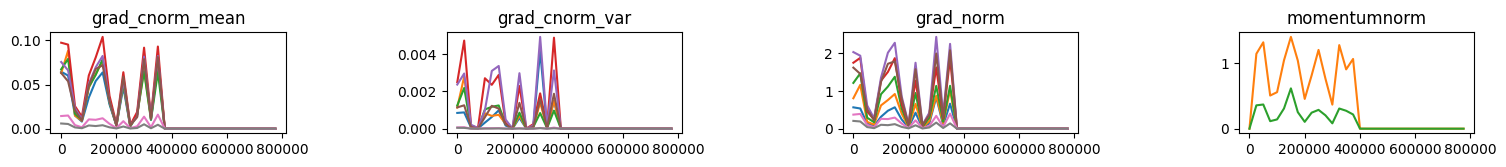

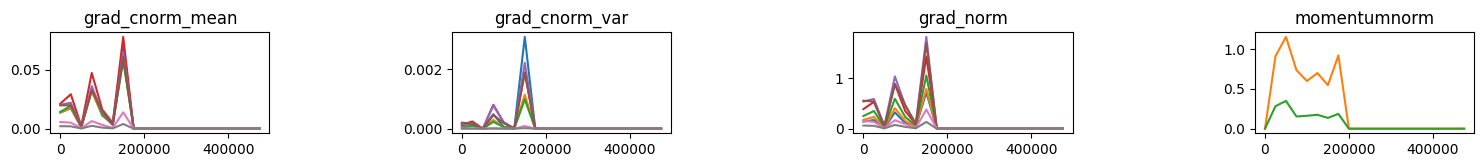

In [11]:
for exp in ["norm/1.0_1","cnorm/0.8_1","cnormu/0.8_1","gcstdu/1.0_1"]:
    fig,axs = plot_data(f"{data_path}/{exp}", lambda d :     
                        {0 :    {
                                0 :  
                                    ("grad_cnorm_mean", d["grad_cnorm_mean"]) , 
                                1 :  
                                    ("grad_cnorm_var", d["grad_cnorm_var"]) ,
                                2 :  
                                    ("grad_norm", d["grad_norm"]) , 
                                3 :  
                                    ("momentumnorm", d["momentumnorm"]) 
                                }})

    fig.tight_layout()
    fig.set_size_inches(16,1.2)
    #lines, labels = axs[0].get_legend_handles_labels()
    plt.show()